In [1]:
import pandas as pd
from collections import Counter
import re
import neologdn
import emoji
import urllib
#from janome.tokenizer import Tokenizer
from nltk import ngrams, FreqDist, ConditionalFreqDist, word_tokenize, pos_tag, download
import matplotlib.pyplot as plt
import seaborn as sns
from src.co_occurrence_network import plot_network
from src.jaccard import Jaccard
import numpy as np

In [2]:
df = pd.read_csv('./data/comment_data.csv')
comment_df = df[df['emoticon_id'] == 'No_id']
comment_df = comment_df['comment']

In [ ]:
# JP
# stop word data
url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
urllib.request.urlretrieve(url, './data/stop_word.txt')

with open('./data/stop_word.txt', 'r', encoding='utf_8') as f:
    stop_word = [i.rstrip('\n') for i in f]

# morphological analysis
t = Tokenizer(mmap=True)
re_hiragana = re.compile(r'^[あ-ん]+$')
sentence_jp = []
tokens_jp = []

for line in jp['word']:
    tmp = []
    malist = t.tokenize(line)
    
    for word in malist:
        base, part = word.surface, word.part_of_speech
        
        # extract Meishi ^ not stop word
        if '名詞' in part and base not in stop_word:
            hiragana = re_hiragana.fullmatch(base) 
            
            # Hiragana (one character) or 'ー'
            if hiragana!=None and len(hiragana[0])==1 or base=='ー':
                continue
            
            tokens_jp.append(base)
            tmp.append(base)
    sentence_jp.append(tmp)
    
del tmp

In [ ]:
download('punkt')
download('averaged_perceptron_tagger')

In [4]:
# EN
tokens_en = []
sentence_en = []
re_eng = re.compile(r'^[a-z]+$')

for line in comment_df:
    tmp = []
    malist = word_tokenize(line)
    malist = pos_tag(malist)
    
    for word in malist:
        if 'NN' in word:
            re_check = re_eng.fullmatch(word[0])
            
            if re_check!=None and len(re_check[0])==1:
                continue
            
            tokens_en.append(word[0])
            tmp.append(word[0])
    
    sentence_en.append(tmp)

del tmp

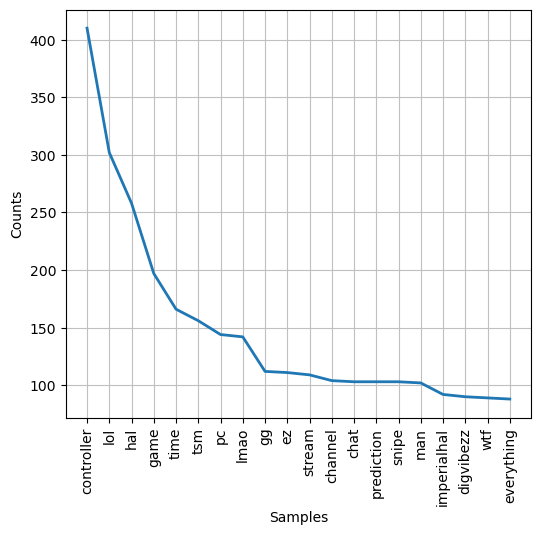

In [8]:
# plot word frequency
tokens_l = [word.lower() for word in tokens_en]
fd = FreqDist(tokens_l)
plt.figure(figsize=(6, 6), dpi=100)
plt.gcf().subplots_adjust(bottom=0.2)
fd.plot(20)
plt.show()
fig.savefig('./result/freq_en.png')